In [8]:
import requests
from bs4 import BeautifulSoup
myBaseUrl = "https://www.amazon.com/Bionix-Safestraw-Drinking-Thickened-Liquids/product-reviews/B00L3D2MY0/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber="
start_urls = []
for i in range(1, 3):
    start_urls.append(myBaseUrl + str(i))
HEADERS = {
    'authority': 'www.amazon.com',
'method' : 'POST',
'path' : '/gp/redirection/singapore.html',
'scheme' : 'https',
'accept':'*/*',
'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.104 Safari/537.36'
    
}
response = []
for i in start_urls:
    response.append(requests.get(i,headers=HEADERS))

In [9]:
print(response)

[<Response [200]>, <Response [200]>]


In [10]:
#collects soup data
soups = []
for i in response:
    soups.append(BeautifulSoup(i.content))
    
#collects and cleans review data
reviews = []
for soup in soups:
    review = soup.findAll("span",{'class':"a-size-base review-text review-text-content"})
    for i in review:
        reviews.append(i.text)
strippedreviews = []
for review in reviews:
    strippedreviews.append(review.strip())

In [11]:
finalstars = []
for soup in soups:
    star = soup.findAll(attrs = {'data-hook':"review-star-rating"})
    for i in star: 
        finalstars.append(i.text)

In [12]:
#collects and cleans title data 
titles = []
for soup in soups:
    title = soup.findAll("a",{'class':"a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold"})
    for i in title:
        titles.append(i.text)
strippedtitles = []
for title in titles:
    strippedtitles.append(title.strip())


In [15]:
#creates a csv file with title and review data 
import pandas as pd    

df = pd.DataFrame(strippedtitles, columns=["title"])   
df.to_csv('soupbionixthick.csv', index=False)  #change name of csv file as needed 
read = pd.read_csv("soupbionixthick.csv")
read["review"] = strippedreviews
read.to_csv("soupbionixthick.csv", index=False)
read["star"] = finalstars
read.to_csv("soupbionixthick.csv", index=False)
df = pd.read_csv("soupbionixthick.csv")

In [16]:
#runs sentiment analysis on collected data in csv file
from textblob import TextBlob
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity


df['polarity'] = df['review'].apply(pol)
df['subjectivity'] = df['review'].apply(sub)
df

,title,review,star,polarity,subjectivity
0,It is great for me overall!,"Really good for me, with difficulty swallowing...",5.0 out of 5 stars,0.750000,0.675000
1,Easy straws for the elderly,It doesn’t work for me I have no suction my th...,1.0 out of 5 stars,0.000000,0.000000
2,4-5 time use,They don’t last too long,3.0 out of 5 stars,-0.025000,0.233333
3,You have to push the straw in very hard!,It helped my sister drink water again after ha...,5.0 out of 5 stars,0.000000,1.000000
4,Difficult to use,Difficult to use.,2.0 out of 5 stars,-0.500000,1.000000
5,Did not work for us,This did not work for my Mom who had a stroke....,1.0 out of 5 stars,-0.200000,0.000000
6,Awesome product!,My student with autism often chickens when dri...,5.0 out of 5 stars,0.600000,0.662963
7,but the product is pretty good l,"Size not the size I expected, but the product ...",3.0 out of 5 stars,0.283333,0.666667
8,Too hard to use for elderly mom,Requires too much suction. Person who would ne...,2.0 out of 5 stars,0.180000,0.320000
9,very small amount of liquid dispenses,We were a little disappointed after trying the...,3.0 out of 5 stars,-0.171875,0.371875


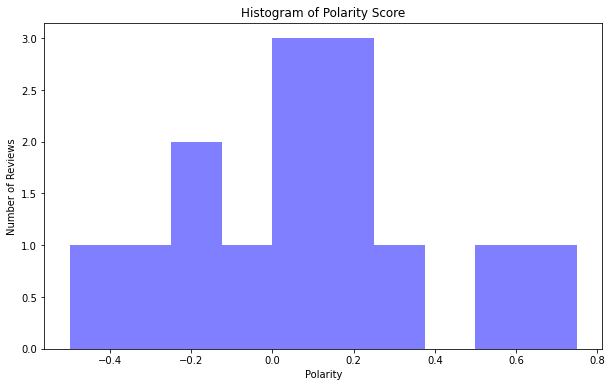

In [17]:
import matplotlib.pyplot as plt
num_bins = 10
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();

In [18]:
mean1 = df['polarity'].mean()
print("Mean of Polarity: ", mean1)
median1 = df['polarity'].median()
print("Median of Polarity: ", median1)

Mean of Polarity:  0.0673422619047619
Median of Polarity:  0.0


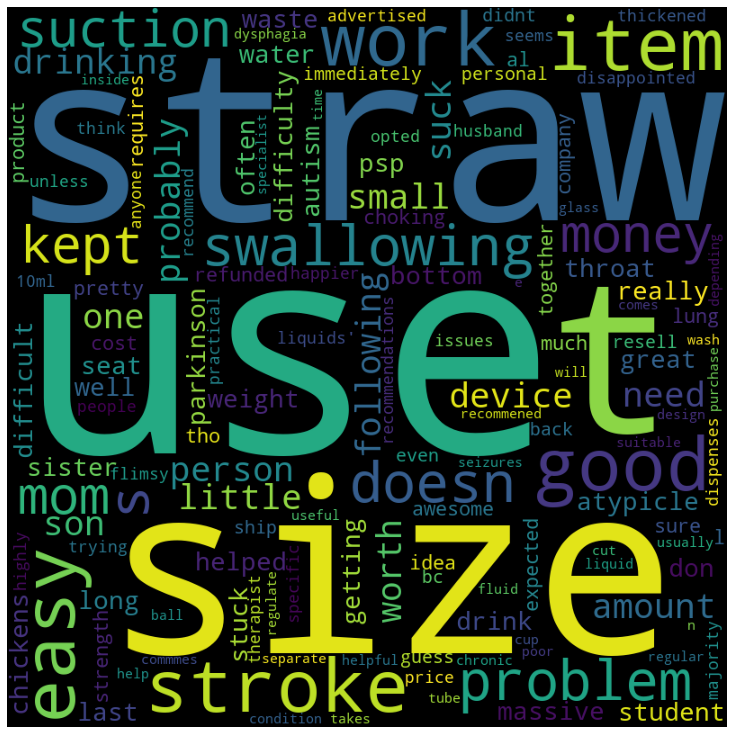

In [20]:
from wordcloud import WordCloud, STOPWORDS
stop_words = set(STOPWORDS)
comment_words = ""
for i in df.review: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    comment_words += " ".join(separate)+" "
final_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

c:\users\jaeme\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Subjectivity Score')

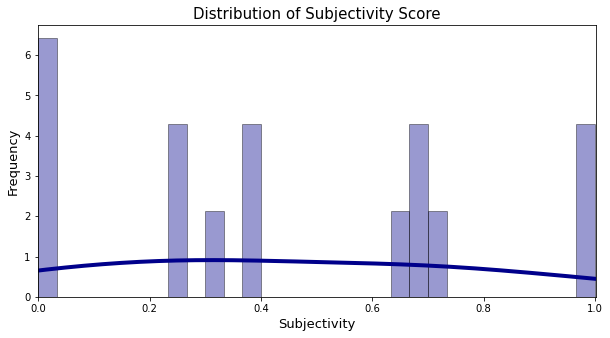

In [21]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.distplot(df['subjectivity'], hist=True, kde=True, 
             bins=int(30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Subjectivity Score', fontsize=15)